In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [40]:
class CPU:
  def __init__(self):
    self.X = 1
    self.cycles = 0
    self.cycle_history= np.zeros(1000)
    self.cycle_history[self.cycles] = self.X
    #self.instruction_dict = {}
    self.ctr = np.zeros((6, 40))
  
  def draw(self):
    ctr_ix = np.unravel_index(self.cycles-1, (6,40))
    if ctr_ix[1] in [self.X-1, self.X, self.X+1]:
      self.ctr[ctr_ix] = 1
  
  def noop(self):
    self.cycles += 1
    self.draw()
    self.cycle_history[self.cycles] = self.X

  def addx(self, v):
    self.cycles += 1
    self.draw()
    self.cycle_history[self.cycles] = self.X
    self.cycles += 1
    self.draw()
    self.X += v
    self.cycle_history[self.cycles] = self.X
    
  def parse(self, line):
    f = line.strip().split(" ")
    #self.instruction_dict[self.cycles] = (f, self.X)
    if f[0]=="addx":
        self.addx(int(f[1]))
    if f[0]=="noop":
        self.noop()

  def get_signal_strength(self):
    test_points = np.arange(20, self.cycles, 40)
    print(test_points)
    # -1 for DURING
    X_vals = self.cycle_history[test_points-1]
    print(X_vals)
    stren = test_points*X_vals
    print(stren)
    return(sum(stren))
  

In [43]:
c = CPU()
with open("10th.txt", "r") as file:
    for i, line in enumerate(file):
        #plt.matshow(c.ctr.reshape(6,40))
        c.parse(line)
        #if c.cycles>=21:
        #  break

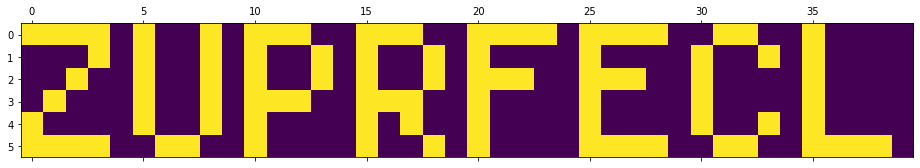

In [44]:
plt.matshow(c.ctr)

96